In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import plotly.express as px

In [5]:
import sklearn

In [6]:
import seaborn as sns

In [7]:
import streamlit as st

In [8]:
df = pd.read_csv("athlete_events.csv")

In [9]:
region_df = pd.read_csv("noc_regions.csv")

In [10]:
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [11]:
df.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [13]:
df.shape

(271116, 15)

In [14]:
region_df.shape

(230, 3)

In [15]:
region_df.sample(3)

NOC            region notes
55   DEN           Denmark   NaN
191  SUR          Suriname   NaN
132  MHL  Marshall Islands   NaN

In [16]:
df = df[df["Season"] == "Summer"]

In [17]:
df.shape

(222552, 15)

In [18]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0    1                           A Dijiang   M  24.0   180.0    80.0   
1    2                            A Lamusi   M  23.0   170.0    60.0   
2    3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3    4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

              Team  NOC        Games  Year  Season         City       Sport  \
0            China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1            China  CHN  2012 Summer  2012  Summer       London        Judo   
2          Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3   Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
26     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                           Event Medal  
0    Basketball Men's Basketball   NaN  
1   Judo Men's Extra-Lightweight   NaN  
2        Football Men's Football   NaN  
3    Tug-Of-War Men's Tug-Of-War  Gold  
26  Athletics Women's 100 metres   NaN

In [19]:
df = df.merge(region_df, on="NOC", how="left")

In [20]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  
0   Basketball Men's Basketball   NaN        China   NaN  
1  Judo Men's Extra-Lightweight   NaN        China   NaN  
2       Football Men's Football   NaN      Denmark   NaN  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN

In [21]:
df["region"].unique().shape

(206,)

In [22]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [23]:
df.duplicated().sum()

1385

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(221167, 17)

In [26]:
df.duplicated().sum()

0

In [27]:
df["Medal"].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [28]:
dummy = pd.get_dummies(df["Medal"], dtype=int)
dummy

Bronze  Gold  Silver
0            0     0       0
1            0     0       0
2            0     0       0
3            0     1       0
4            0     0       0
...        ...   ...     ...
222547       0     0       0
222548       0     0       0
222549       0     0       0
222550       0     0       0
222551       0     0       0

[221167 rows x 3 columns]

In [29]:
df = pd.concat([df, dummy], axis=1)

In [30]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [31]:
df.groupby("NOC")[["Gold", "Silver", "Bronze"]].sum().sort_values("Gold", ascending = False).reset_index()

NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [32]:
medal_tally = df.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"])

In [33]:
medal_tally.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [34]:
medal_tally = medal_tally.groupby("region").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold", ascending = False).reset_index()

In [35]:
medal_tally[medal_tally["region"] == "India"]

region  Gold  Silver  Bronze
46  India     9       7      12

In [36]:
medal_tally["Total"] = medal_tally["Gold"]+medal_tally["Silver"]+medal_tally["Bronze"]

In [37]:
medal_tally.head()

region  Gold  Silver  Bronze  Total
0      USA  1035     802     708   2545
1   Russia   592     498     487   1577
2  Germany   444     457     491   1392
3       UK   278     317     300    895
4   France   234     256     287    777

In [38]:
df["Year"].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [39]:
df["Year"].unique().tolist()

[1992,
 2012,
 1920,
 1900,
 1932,
 1952,
 2000,
 1996,
 1912,
 1924,
 1948,
 2008,
 2016,
 2004,
 1984,
 1968,
 1972,
 1988,
 1936,
 1956,
 1960,
 1928,
 1976,
 1980,
 1964,
 1906,
 1904,
 1908,
 1896]

In [40]:
years = df["Year"].unique().tolist()

In [41]:
years.sort()

In [42]:
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [43]:
years.insert(0,"Overall")

In [44]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [45]:
df["region"].dropna().unique().tolist()

['China',
 'Denmark',
 'Netherlands',
 'Finland',
 'Norway',
 'Romania',
 'Estonia',
 'France',
 'Morocco',
 'Spain',
 'Egypt',
 'Iran',
 'Bulgaria',
 'Italy',
 'Chad',
 'Azerbaijan',
 'Sudan',
 'Russia',
 'Argentina',
 'Cuba',
 'Belarus',
 'Greece',
 'Cameroon',
 'Turkey',
 'Chile',
 'Mexico',
 'USA',
 'Nicaragua',
 'Hungary',
 'Nigeria',
 'Algeria',
 'Kuwait',
 'Bahrain',
 'Pakistan',
 'Iraq',
 'Syria',
 'Lebanon',
 'Qatar',
 'Malaysia',
 'Germany',
 'Canada',
 'Ireland',
 'Australia',
 'South Africa',
 'Eritrea',
 'Tanzania',
 'Jordan',
 'Tunisia',
 'Libya',
 'Belgium',
 'Djibouti',
 'Palestine',
 'Comoros',
 'Kazakhstan',
 'Brunei',
 'India',
 'Saudi Arabia',
 'Maldives',
 'Ethiopia',
 'United Arab Emirates',
 'Yemen',
 'Indonesia',
 'Philippines',
 'Uzbekistan',
 'Kyrgyzstan',
 'Tajikistan',
 'Japan',
 'Republic of Congo',
 'Switzerland',
 'Brazil',
 'Monaco',
 'Israel',
 'Uruguay',
 'Sweden',
 'Sri Lanka',
 'Armenia',
 'Ivory Coast',
 'Kenya',
 'Benin',
 'UK',
 'Ghana',
 'Somalia

In [46]:
country = df["region"].dropna().unique().tolist()

In [47]:
country.sort()

In [48]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [49]:
country.insert(0,"Overall")

In [50]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [51]:
def fetch_medal_tally(df,year,country):
    medal_df = df.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"])
    flag = 0
    if year == "Overall" and country == "Overall":
        temp_df = medal_df
    if year == "Overall" and country != "Overall":
        flag = 1
        temp_df = medal_df[medal_df["region"] == country]
    if year != "Overall" and country == "Overall":
        temp_df = medal_df[medal_df["Year"] == int(year)]
    if year != "Overall" and country != "Overall":
        temp_df = medal_df[(medal_df["Year"] == year) & (medal_df["region"] == country)]

    if flag == 1:
        x = temp_df.groupby("Year").sum()[["Gold", "Silver", "Bronze"]].sort_values("Year").reset_index()
    else:
        x = temp_df.groupby("region").sum()[["Gold", "Silver", "Bronze"]].sort_values("Gold", ascending = False).reset_index()
    x["Total"] = x["Gold"]+x["Silver"]+x["Bronze"]

    return x

In [52]:
medal_df = df.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"])

In [53]:
medal_df[(medal_df["Year"] == 2016) & (medal_df["region"] == "India")]

ID                      Name Sex   Age  Height  Weight   Team  \
1015       663     Sharath Kamal Achanta   M  34.0   186.0    85.0  India   
7065      4523               Seema Antil   F  33.0   182.0    92.0  India   
8713      5562               Aditi Ashok   F  18.0   173.0    57.0  India   
9202      5868                Manu Attri   M  23.0   172.0    73.0  India   
10070     6427      Lalita Shivaji Babar   F  27.0   166.0    50.0  India   
...        ...                       ...  ..   ...     ...     ...    ...   
182260  111467  Sathish Kumar Sivalingam   M  24.0   175.0    77.0  India   
195568  119515               Shiva Thapa   M  22.0   169.0    56.0  India   
198042  120871             Sandeep Tomar   M  25.0   168.0    61.0  India   
216942  132143       Vikas Krishan Yadav   M  24.0   177.0    69.0  India   
216985  132177      Mohammad Anas Yahiya   M  21.0   177.0    69.0  India   

        NOC        Games  Year  Season            City          Sport  \
1015    IND  2016 Summer  2016  Summer  Rio de Janeiro   Table Tennis   
7065    IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   
8713    IND  2016 Summer  2016  Summer  Rio de Janeiro           Golf   
9202    IND  2016 Summer  2016  Summer  Rio de Janeiro      Badminton   
10070   IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   
...     ...          ...   ...     ...             ...            ...   
182260  IND  2016 Summer  2016  Summer  Rio de Janeiro  Weightlifting   
195568  IND  2016 Summer  2016  Summer  Rio de Janeiro         Boxing   
198042  IND  2016 Summer  2016  Summer  Rio de Janeiro      Wrestling   
216942  IND  2016 Summer  2016  Summer  Rio de Janeiro         Boxing   
216985  IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   

                                              Event Medal region notes  \
1015                     Table Tennis Men's Singles   NaN  India   NaN   
7065                 Athletics Women's Discus Throw   NaN  India   NaN   
8713                        Golf Women's Individual   NaN  India   NaN   
9202                        Badminton Men's Doubles   NaN  India   NaN   
10070   Athletics Women's 3,000 metres Steeplechase   NaN  India   NaN   
...                                             ...   ...    ...   ...   
182260             Weightlifting Men's Middleweight   NaN  India   NaN   
195568                    Boxing Men's Bantamweight   NaN  India   NaN   
198042     Wrestling Men's Featherweight, Freestyle   NaN  India   NaN   
216942                    Boxing Men's Middleweight   NaN  India   NaN   
216985                   Athletics Men's 400 metres   NaN  India   NaN   

        Bronze  Gold  Silver  
1015         0     0       0  
7065         0     0       0  
8713         0     0       0  
9202         0     0       0  
10070        0     0       0  
...        ...   ...     ...  
182260       0     0       0  
195568       0     0       0  
198042       0     0       0  
216942       0     0       0  
216985       0     0       0  

[68 rows x 20 columns]

## Overall Analysis.
#### No. of Editions
#### No. of Cities
#### No. of Events/sports
#### No. athletes
#### Participating nations

In [54]:
df.shape

(221167, 20)

In [55]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [56]:
df["Year"].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [57]:
df["Year"].unique().shape[0]-1

28

In [58]:
df["City"].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [59]:
df["City"].unique().shape[0]

23

In [60]:
df["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [61]:
df["Sport"].unique().shape[0]

52

In [62]:
df["Event"].unique().shape[0]

651

In [63]:
df["Name"].unique().shape[0]

116122

In [64]:
df["region"].unique().shape[0]

206

In [65]:
df.head(2)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal region  \
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN  China   
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN  China   

  notes  Bronze  Gold  Silver  
0   NaN       0     0       0  
1   NaN       0     0       0

In [66]:
year_count = df.drop_duplicates(["Year", "region"])["Year"].value_counts().reset_index().sort_values("Year")

In [67]:
year_count.rename(columns={"count":"No. of Countries"}, inplace = True)

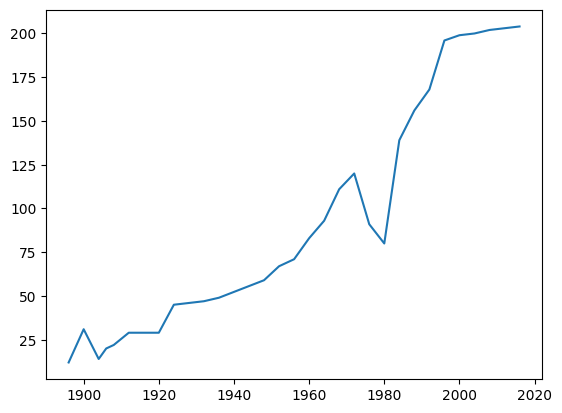

In [68]:
plt.plot(year_count["Year"], year_count["No. of Countries"])

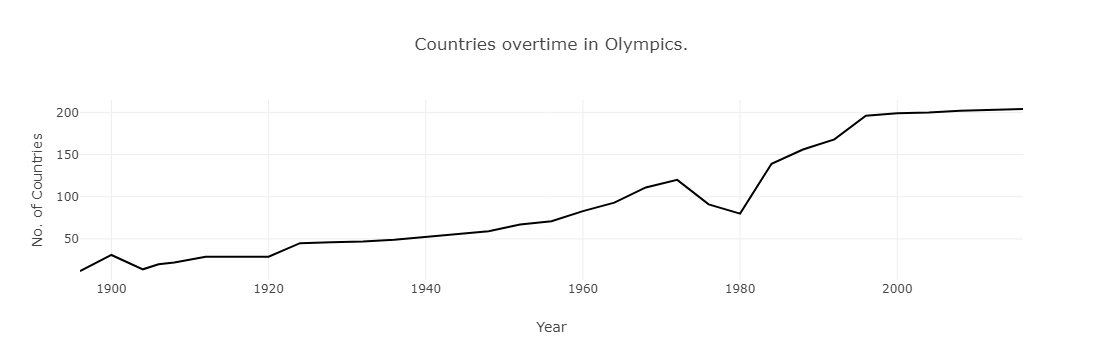

In [69]:
fig = px.line(year_count, x="Year", y="No. of Countries", title='Countries overtime in Olympics.')
fig.show()

In [70]:
year_count = df.drop_duplicates(["Year", "Event"])["Year"].value_counts().reset_index().sort_values("Year")

In [71]:
year_count

Year  count
28  1896     43
26  1900     90
25  1904     95
27  1906     74
23  1908    109
24  1912    107
14  1920    158
20  1924    131
22  1928    122
21  1932    131
18  1936    150
15  1948    153
19  1952    149
16  1956    151
17  1960    150
13  1964    163
12  1968    172
11  1972    193
10  1976    198
9   1980    203
8   1984    221
7   1988    237
6   1992    257
5   1996    271
4   2000    300
3   2004    301
1   2008    302
2   2012    302
0   2016    306

In [72]:
x = df.drop_duplicates(["Year", "Sport", "Event"])

In [73]:
x.pivot_table(index="Sport", columns="Year", values="Event", aggfunc="count").fillna(0).astype("int")

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aeronautics               0     0     0     0     0     0     0     0     0   
Alpinism                  0     0     0     0     0     0     0     0     0   
Archery                   0     8     6     0     3     0    10     0     0   
Art Competitions          0     0     0     0     0     5     5     5    13   
Athletics                12    23    24    21    26    30    29    27    27   
Badminton                 0     0     0     0     0     0     0     0     0   
Baseball                  0     0     0     0     0     0     0     0     0   
Basketball                0     0     0     0     0     0     0     0     0   
Basque Pelota             0     1     0     0     0     0     0     0     0   
Beach Volleyball          0     0     0     0     0     0     0     0     0   
Boxing                    0     0     7     0     5     0     8     8     8   
Canoeing                  0     0     0     0     0     0     0     0     0   
Cricket                   0     1     0     0     0     0     0     0     0   
Croquet                   0     3     0     0     0     0     0     0     0   
Cycling                   6     3     7     6     6     2     6     6     6   
Diving                    0     0     1     1     2     4     5     5     4   
Equestrianism             0     5     0     0     0     5     7     5     6   
Fencing                   3     7     5     8     4     5     6     7     7   
Figure Skating            0     0     0     0     4     0     3     0     0   
Football                  0     1     1     1     1     1     1     1     1   
Golf                      0     2     2     0     0     0     0     0     0   
Gymnastics                8     1    12     4     2     4     4     9     8   
Handball                  0     0     0     0     0     0     0     0     0   
Hockey                    0     0     0     0     1     0     1     0     1   
Ice Hockey                0     0     0     0     0     0     1     0     0   
Jeu De Paume              0     0     0     0     1     0     0     0     0   
Judo                      0     0     0     0     0     0     0     0     0   
Lacrosse                  0     0     1     0     1     0     0     0     0   
Modern Pentathlon         0     0     0     0     0     1     1     1     1   
Motorboating              0     0     0     0     3     0     0     0     0   
Polo                      0     1     0     0     1     0     1     1     0   
Racquets                  0     0     0     0     2     0     0     0     0   
Rhythmic Gymnastics       0     0     0     0     0     0     0     0     0   
Roque                     0     0     1     0     0     0     0     0     0   
Rowing                    0     4     5     6     4     4     5     7     7   
Rugby                     0     1     0     0     1     0     1     1     0   
Rugby Sevens              0     0     0     0     0     0     0     0     0   
Sailing                   0     8     0     0     4     4    10     3     3   
Shooting                  5     8     0    12    15    18    22    10     0   
Softball                  0     0     0     0     0     0     0     0     0   
Swimming                  4     7    10     4     6     9    10    11    11   
Synchronized Swimming     0     0     0     0     0     0     0     0     0   
Table Tennis              0     0     0     0     0     0     0     0     0   
Taekwondo                 0     0     0     0     0     0     0     0     0   
Tennis                    2     4     2     4     6     8     5     5     0   
Trampolining              0     0     0     0     0     0     0     0     0   
Triathlon                 0     0     0     0     0     0     0     0     0   
Tug-Of-War                0     1     1     1     1     1     1     0     0   
Volleyball                0     0     0     0     

<Axes: xlabel='Year', ylabel='Sport'>

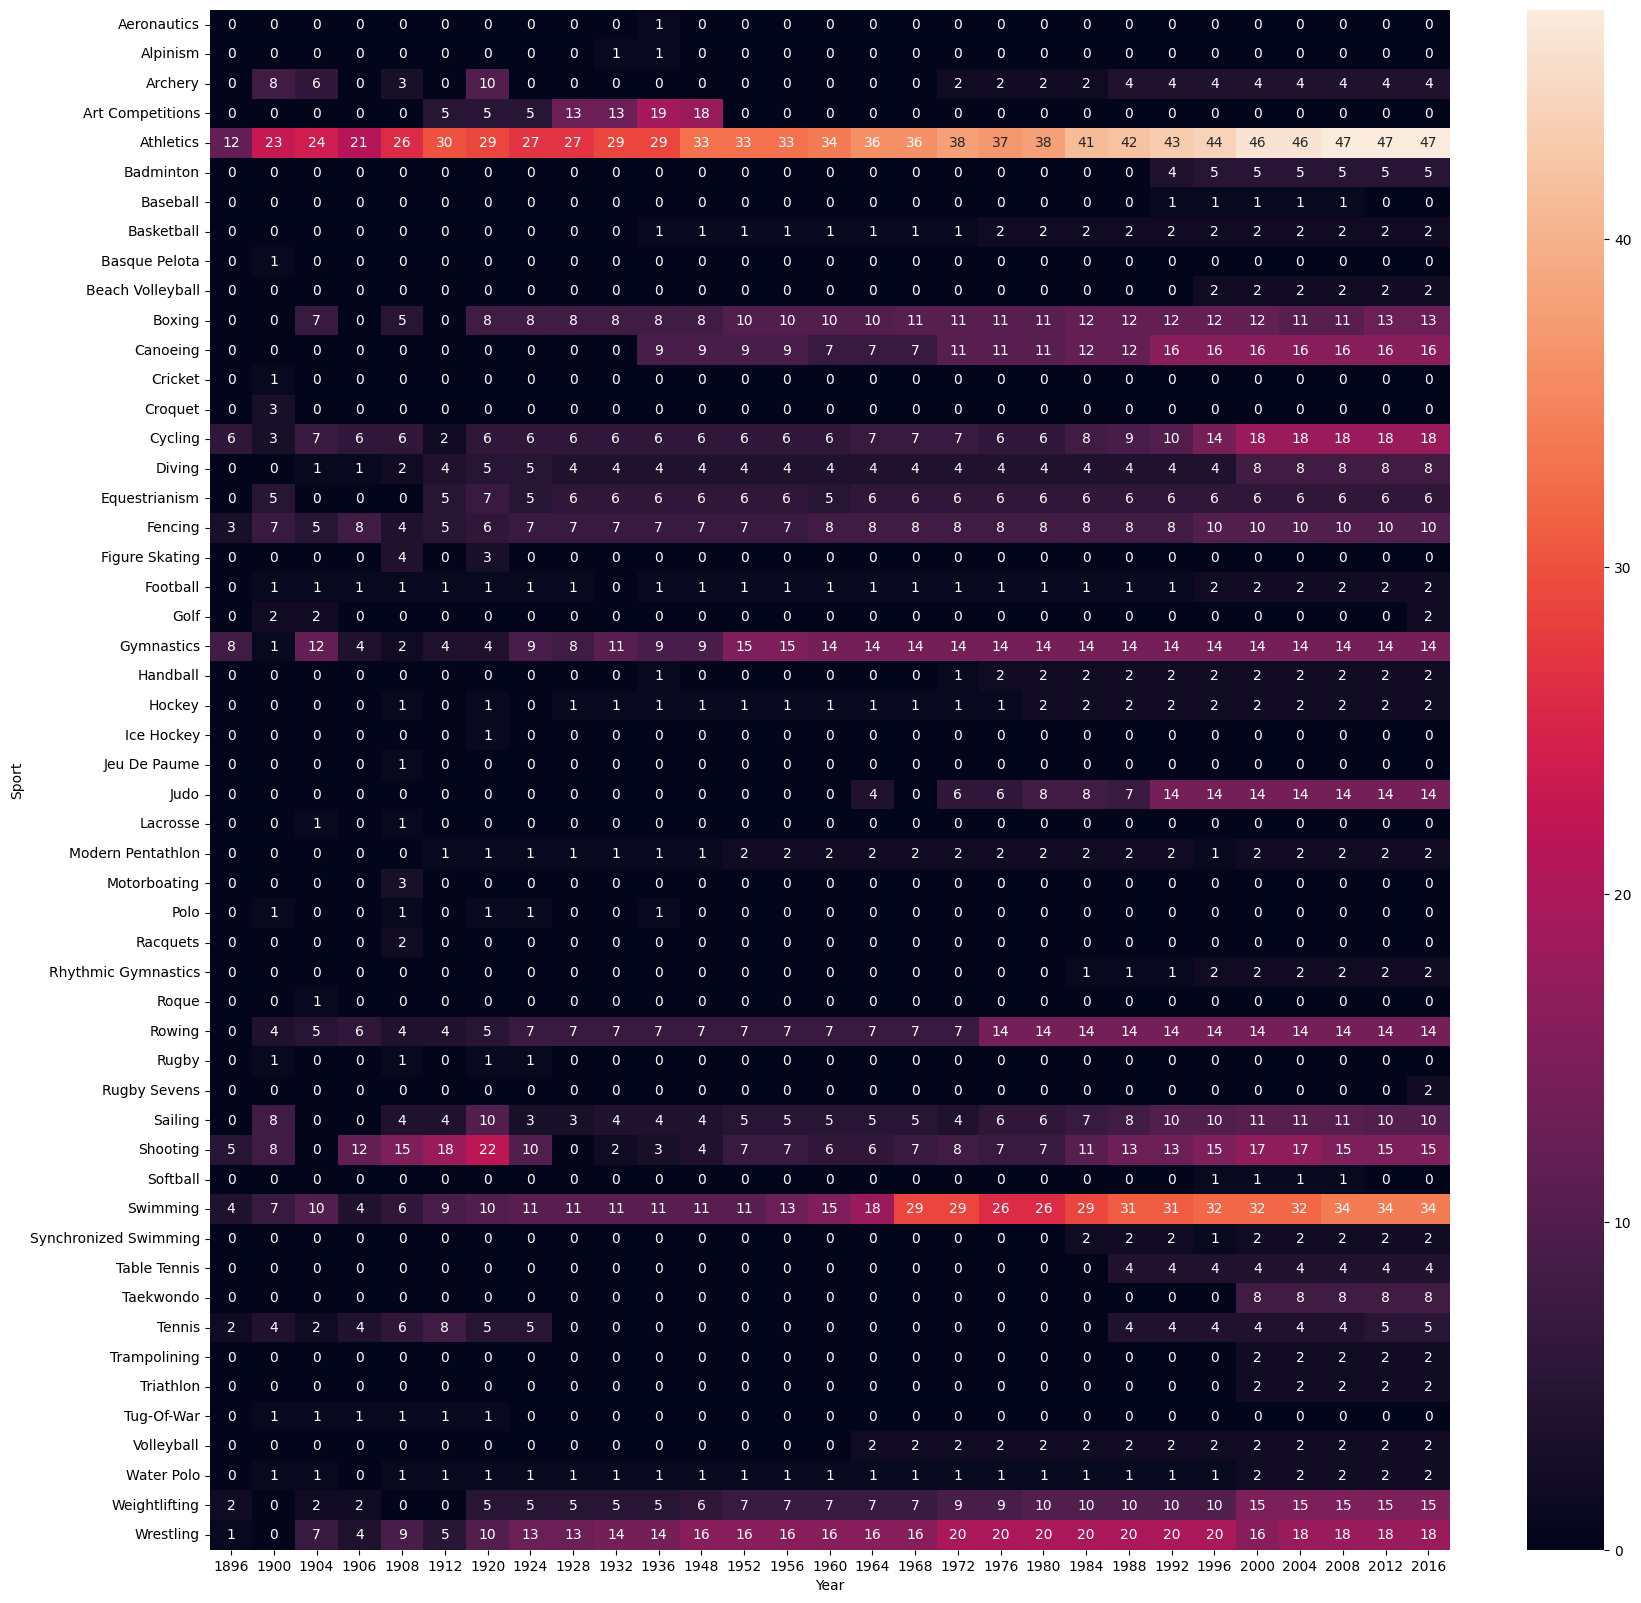

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index="Sport", columns="Year", values="Event", aggfunc="count").fillna(0).astype("int"),annot=True)

In [75]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=["Medal"])

    if sport != "Overall":
        temp_df = temp_df[temp_df["Sport"] == sport]
    x= temp_df["Name"].value_counts().reset_index().head(15).merge(df,left_on="Name", right_on="Name",how="left")[["Name","count","Sport","region"]].drop_duplicates("Name")
    x.rename(columns={"count":"Medals"}, inplace=True)
    return x

In [76]:
most_successful(df, "Swimming")

Name  Medals     Sport  \
0                            Michael Fred Phelps, II      28  Swimming   
30   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12  Swimming   
47              Dara Grace Torres (-Hoffman, -Minas)      12  Swimming   
60                                Ryan Steven Lochte      12  Swimming   
74                     Natalie Anne Coughlin (-Hall)      12  Swimming   
86                    Matthew Nicholas "Matt" Biondi      11  Swimming   
98                                 Mark Andrew Spitz      11  Swimming   
110                             Gary Wayne Hall, Jr.      10  Swimming   
120                            Franziska van Almsick      10  Swimming   
143                        Shirley Frances Babashoff       9  Swimming   
154                                 Ian James Thorpe       9  Swimming   
164                               Leisel Marie Jones       9  Swimming   
174                    Aleksandr Vladimirovich Popov       9  Swimming   
189                         Zoltn Imre dn von Halmay       9  Swimming   
198                  Donald Arthur "Don" Schollander       8  Swimming   

        region  
0          USA  
30         USA  
47         USA  
60         USA  
74         USA  
86         USA  
98         USA  
110        USA  
120    Germany  
143        USA  
154  Australia  
164  Australia  
174     Russia  
189    Hungary  
198        USA

## Country wise Analysis
#### Country wise medal tally per year(line plot)
#### What countries are good at(heatmap)
#### Most successful Athletes(Top 10)

In [77]:
df.head(2)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal region  \
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN  China   
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN  China   

  notes  Bronze  Gold  Silver  
0   NaN       0     0       0  
1   NaN       0     0       0

In [78]:
temp_df = df.dropna(subset=["Medal"])

In [79]:
temp_df.head(2)

ID                  Name Sex   Age  Height  Weight            Team  NOC  \
3    4  Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden  DEN   
12  15  Arvo Ossian Aaltonen   M  30.0     NaN     NaN         Finland  FIN   

          Games  Year  Season       City       Sport  \
3   1900 Summer  1900  Summer      Paris  Tug-Of-War   
12  1920 Summer  1920  Summer  Antwerpen    Swimming   

                                     Event   Medal   region notes  Bronze  \
3              Tug-Of-War Men's Tug-Of-War    Gold  Denmark   NaN       0   
12  Swimming Men's 200 metres Breaststroke  Bronze  Finland   NaN       1   

    Gold  Silver  
3      1       0  
12     0       0

In [80]:
temp_df.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"], inplace=True)

C:\Users\Trainee-03\AppData\Local\Temp\ipykernel_19184\1599316304.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
new_df=temp_df[temp_df["region"]=="India"]
new_df.groupby("Year").count()["Medal"].reset_index()

Year  Medal
0   1900      2
1   1928      1
2   1932      1
3   1936      1
4   1948      1
5   1952      2
6   1956      1
7   1960      1
8   1964      1
9   1968      1
10  1972      1
11  1980      1
12  1996      1
13  2000      1
14  2004      1
15  2008      3
16  2012      6
17  2016      2

In [82]:
final_df = new_df.groupby("Year").count()["Medal"].reset_index()

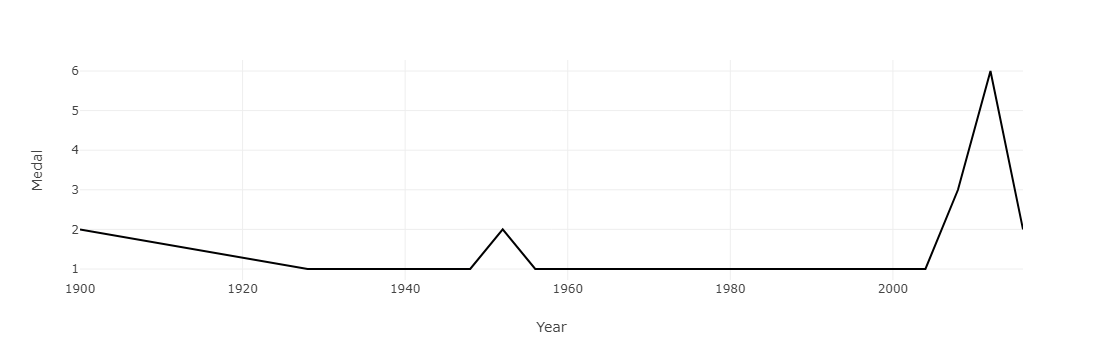

In [83]:
fig = px.line(final_df, x = "Year", y="Medal")
fig.show()

In [84]:
temp_df = df.dropna(subset=["Medal"])
new_df=temp_df[temp_df["region"]=="China"]

In [85]:
new_df.pivot_table(index="Sport", columns="Year", values="Medal", aggfunc="count").fillna(0).astype("int")

Year                   1984  1988  1992  1996  2000  2004  2008  2012  2016
Sport                                                                      
Archery                   1     0     3     1     0     3     7     4     0
Athletics                 1     1     4     4     1     2     2     6     6
Badminton                 0     0     8     7    12     8    12    12     5
Basketball               12     0    11     0     0     0     0     0     0
Beach Volleyball          0     0     0     0     0     0     4     0     0
Boxing                    0     0     0     0     0     1     4     3     4
Canoeing                  0     0     0     0     0     2     2     0     0
Cycling                   0     0     0     0     1     1     1     5     2
Diving                    3     6     5     5    14    12    15    14    14
Fencing                   1     0     1     0     6     6     5     6     5
Football                  0     0     0    15     0     0     0     0     0
Golf                      0     0     0     0     0     0     0     0     1
Gymnastics               21     2    13    12    12     3    24    12    10
Handball                 13     0     0     0     0     0     0     0     0
Hockey                    0     0     0     0     0     0    16     0     0
Judo                      0     0     3     2     4     5     4     2     2
Modern Pentathlon         0     0     0     0     0     0     0     1     0
Rhythmic Gymnastics       0     0     0     0     0     0     6     0     0
Rowing                    0    14     2     2     0     0     6     2     3
Sailing                   0     0     1     1     0     1     2     1     1
Shooting                  6     2     4     5     8     9     8     7     7
Softball                  0     0     0    15     0     0     0     0     0
Swimming                  0     4    13    12     0     6    14    15     6
Synchronized Swimming     0     0     0     0     0     0     9    11    11
Table Tennis              0     7     9    12    12    11    12    10    10
Taekwondo                 0     0     0     0     1     2     2     3     2
Tennis                    0     0     0     0     0     2     2     0     0
Trampolining              0     0     0     0     0     1     3     4     3
Volleyball               10    11     0     9     0    12    12     0    12
Weightlifting             6     5     4     4     7     8     9     7     7
Wrestling                 0     0     1     1     1     1     3     1     2

<Axes: xlabel='Year', ylabel='Sport'>

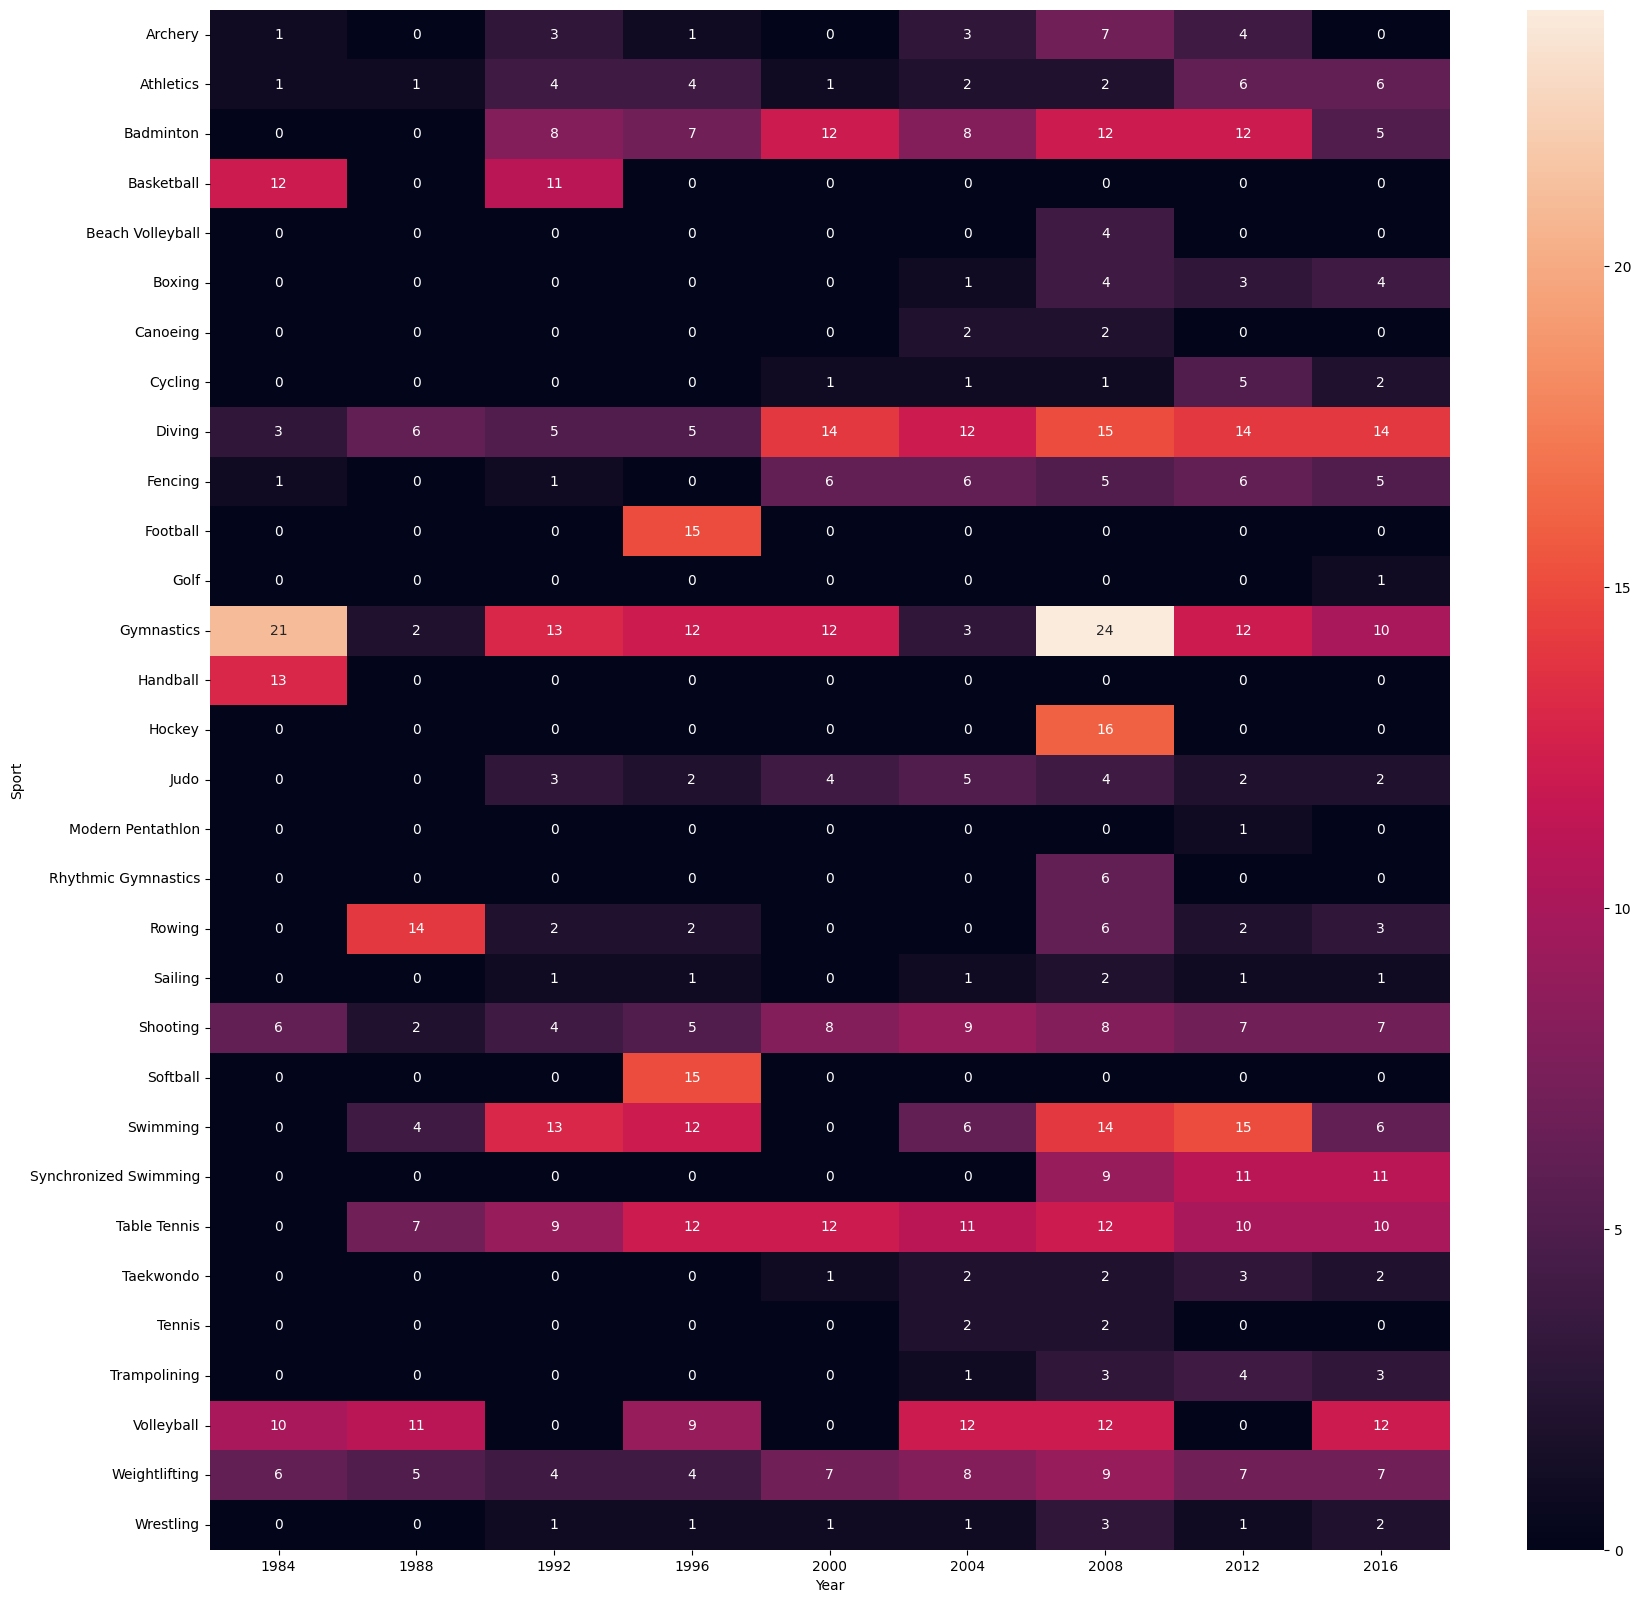

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index="Sport", columns="Year", values="Medal", aggfunc="count").fillna(0).astype("int"),annot=True)

In [87]:
def most_successful_athletes(df, country):
    temp_df = df.dropna(subset=["Medal"])

    #if country != "Overall":
    temp_df = temp_df[temp_df["region"] == country]
    x= temp_df["Name"].value_counts().reset_index().head(15).merge(df,left_on="Name", right_on="Name",how="left")[["Name","count","Sport"]].drop_duplicates("Name")
    x.rename(columns={"count":"Medals"}, inplace=True)
    return x

In [88]:
most_successful_athletes(df, "Jamaica")

Name  Medals      Sport
0           Merlene Joyce Ottey-Page       9  Athletics
19   Veronica Angella Campbell-Brown       8  Athletics
30                Usain St. Leo Bolt       8  Athletics
40           Shelly-Ann Fraser-Pryce       6  Athletics
47     Donald O'Reilly "Don" Quarrie       4  Athletics
56     Herbert Henry "Herb" McKenley       4  Athletics
62               Arthur Stanley Wint       4  Athletics
68    Novlene Hilaire Williams-Mills       4  Athletics
75                       Yohan Blake       4  Athletics
81          Sherone Anmarica Simpson       3  Athletics
88              Juliet Jean Cuthbert       3  Athletics
98                    Kerron Stewart       3  Athletics
103                  Elaine Thompson       3  Athletics
106         Shericka Nicola Williams       3  Athletics
109      Beverly McDonald (-Stewart)       3  Athletics

## Athlete wise Analysis

In [89]:
import plotly.figure_factory as ff

In [90]:
athlete_df = df.drop_duplicates(subset=["Name", "region"])

In [91]:
x1 = athlete_df["Age"].dropna()
x2 = athlete_df[athlete_df["Medal"] == "Gold"]["Age"].dropna()
x3 = athlete_df[athlete_df["Medal"] == "Silver"]["Age"].dropna()
x4 = athlete_df[athlete_df["Medal"] == "Bronze"]["Age"].dropna()

In [92]:
x2

3         34.0
33        27.0
60        25.0
111       23.0
116       22.0
          ... 
222253    22.0
222334    22.0
222429    19.0
222463    23.0
222526    21.0
Name: Age, Length: 5570, dtype: float64

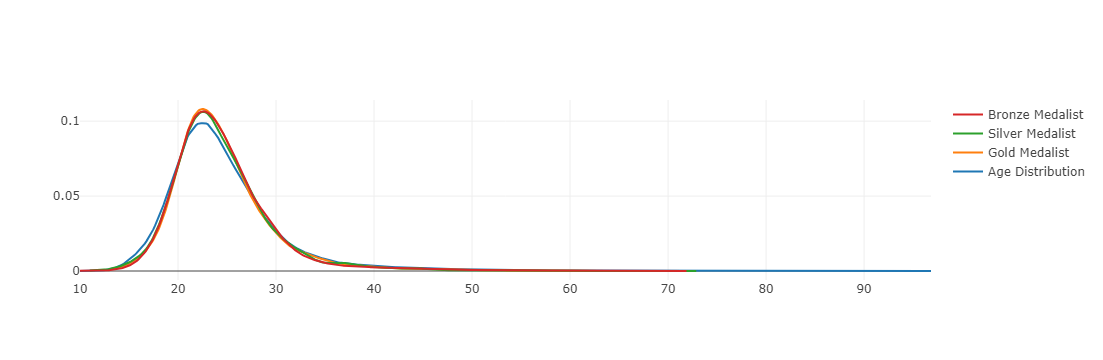

In [93]:
fig = ff.create_distplot([x1,x2,x3,x4], ["Age Distribution","Gold Medalist","Silver Medalist","Bronze Medalist"], show_hist=False, show_rug=False)
fig.show()

In [94]:
famous_sports1 = df["Sport"].unique().tolist()

In [95]:
famous_sports1

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Modern Pentathlon',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Trampolining',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']

In [96]:
famous_sports =['Basketball','Judo', 'Football','Tug-Of-War','Athletics','Swimming','Badminton','Sailing','Gymnastics','Art Competitions',
                'Handball','Weightlifting','Wrestling','Water Polo','Hockey','Rowing','Fencing','Shooting','Boxing','Taekwondo',
                'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery', 'Volleyball','Synchronized Swimming',
                 'Table Tennis', 'Baseball','Rhythmic Gymnastics','Rugby Sevens', 'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo', 'Cricket',
                'Ice Hockey','Motorboating']

In [97]:
x = []
name = []
for sport in famous_sports:
    temp_df = athlete_df[athlete_df["Sport"] == sport]
    x.append(temp_df[temp_df["Medal"]=="Gold"]["Age"].dropna())
    name.append(sport)

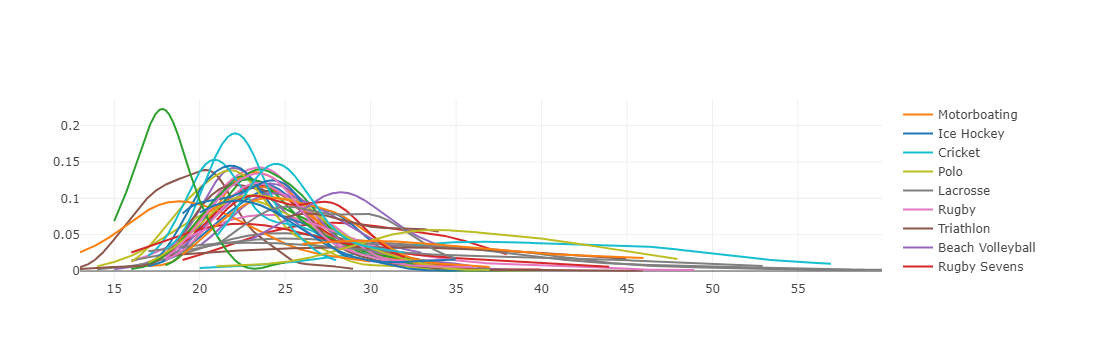

In [98]:
fig = ff.create_distplot(x,name,show_hist=False, show_rug=False)
fig.show()

In [99]:
athlete_df["Medal"].fillna("No Medal", inplace=True)

In [100]:
athlete_df.head(5)

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event     Medal       region notes  Bronze  Gold  \
0   Basketball Men's Basketball  No Medal        China   NaN       0     0   
1  Judo Men's Extra-Lightweight  No Medal        China   NaN       0     0   
2       Football Men's Football  No Medal      Denmark   NaN       0     0   
3   Tug-Of-War Men's Tug-Of-War      Gold      Denmark   NaN       0     1   
4  Athletics Women's 100 metres  No Medal  Netherlands   NaN       0     0   

   Silver  
0       0  
1       0  
2       0  
3       0  
4       0

<Axes: xlabel='Weight', ylabel='Height'>

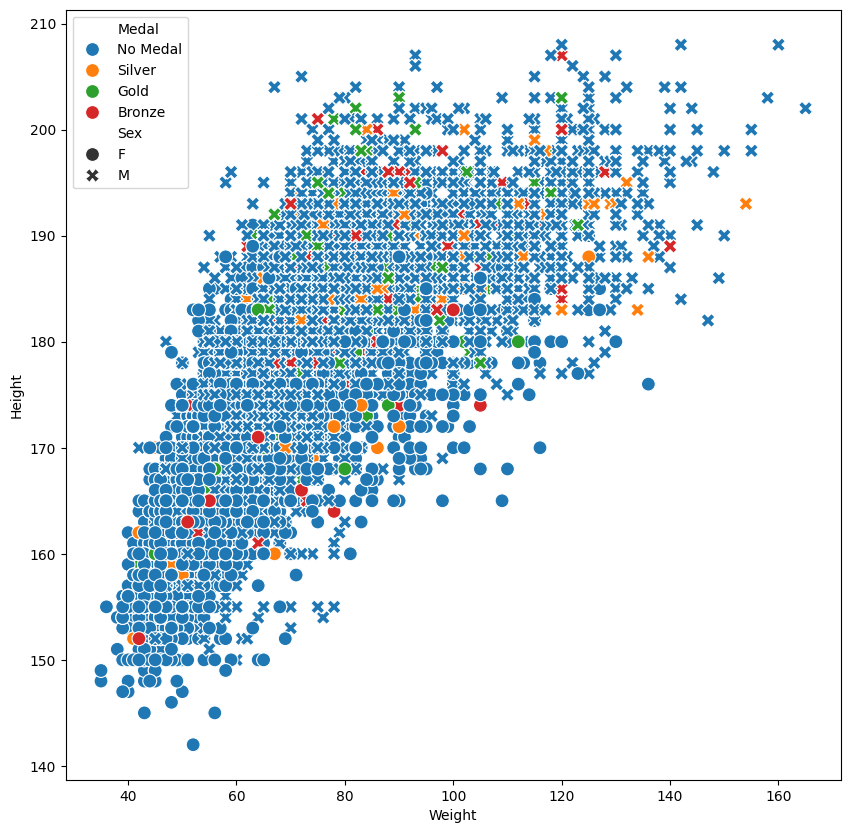

In [101]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df["Sport"]=="Athletics"]
sns.scatterplot(athlete_df, x ="Weight",y = "Height", hue=temp_df["Medal"],style=temp_df["Sex"],s=100)

In [102]:
men = athlete_df[athlete_df["Sex"]=="M"].groupby("Year").count()["Name"].reset_index()
women = athlete_df[athlete_df["Sex"]=="F"].groupby("Year").count()["Name"].reset_index()

In [103]:
final = men.merge(women, on="Year", how="left")

In [104]:
final.rename(columns={"Name_x":"Male", "Name_y":"Female"}, inplace=True)

In [105]:
final.fillna(0, inplace=True)

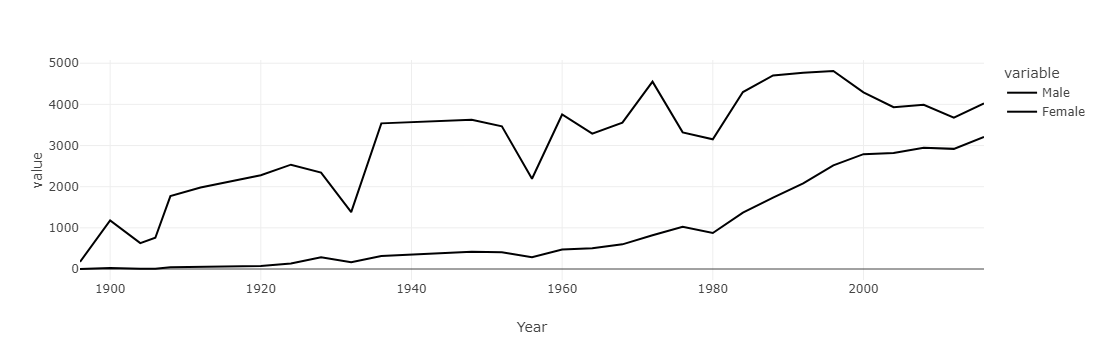

In [106]:
fig = px.line(final, x="Year", y=["Male","Female"])
fig.show()

In [107]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [163]:
n_df = df.drop_duplicates(subset="Year").sort_values("Year")[["Year","City"]]

In [164]:
n_df

Year            City
2676  1896          Athina
3     1900           Paris
629   1904       St. Louis
202   1906          Athina
979   1908          London
10    1912       Stockholm
2     1920       Antwerpen
14    1924           Paris
71    1928       Amsterdam
4     1932     Los Angeles
44    1936          Berlin
15    1948          London
6     1952        Helsinki
66    1956       Melbourne
67    1960            Roma
130   1964           Tokyo
39    1968     Mexico City
40    1972          Munich
83    1976        Montreal
126   1980          Moskva
38    1984     Los Angeles
41    1988           Seoul
0     1992       Barcelona
8     1996         Atlanta
7     2000          Sydney
36    2004          Athina
33    2008         Beijing
1     2012          London
34    2016  Rio de Janeiro

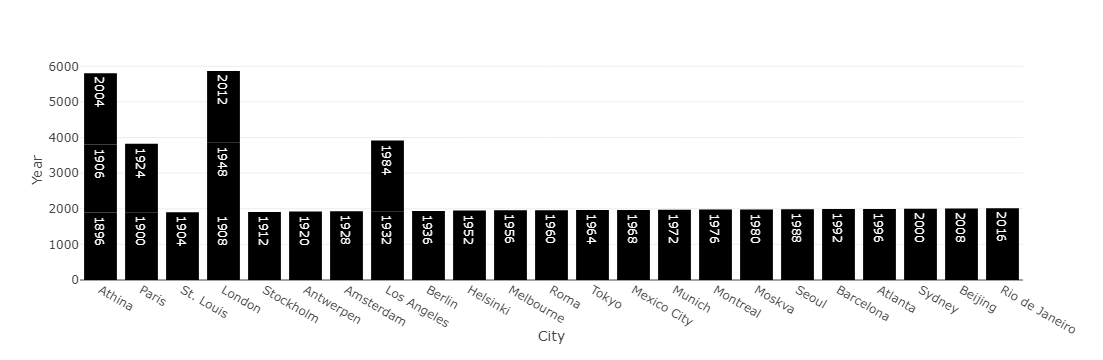

In [165]:
fig = px.bar(n_df, x='City', y='Year',text_auto = True)
fig.show()

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221167 entries, 0 to 222551
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      221167 non-null  int64  
 1   Name    221167 non-null  object 
 2   Sex     221167 non-null  object 
 3   Age     212137 non-null  float64
 4   Height  170667 non-null  float64
 5   Weight  168661 non-null  float64
 6   Team    221167 non-null  object 
 7   NOC     221167 non-null  object 
 8   Games   221167 non-null  object 
 9   Year    221167 non-null  int64  
 10  Season  221167 non-null  object 
 11  City    221167 non-null  object 
 12  Sport   221167 non-null  object 
 13  Event   221167 non-null  object 
 14  Medal   34077 non-null   object 
 15  region  220797 non-null  object 
 16  notes   4397 non-null    object 
 17  Bronze  221167 non-null  int32  
 18  Gold    221167 non-null  int32  
 19  Silver  221167 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(12)
memory 

In [148]:
sport_df = df["Sport"].value_counts().reset_index()

In [154]:
sport_df

Sport  count
0               Athletics  38624
1              Gymnastics  26707
2                Swimming  23195
3                Shooting  11448
4                 Cycling  10827
5                 Fencing  10735
6                  Rowing  10595
7               Wrestling   7154
8                Football   6745
9                 Sailing   6549
10          Equestrianism   6343
11               Canoeing   6171
12                 Boxing   6047
13                 Hockey   5417
14             Basketball   4536
15          Weightlifting   3937
16             Water Polo   3846
17                   Judo   3801
18               Handball   3665
19             Volleyball   3404
20                 Tennis   2862
21                 Diving   2842
22                Archery   2334
23       Art Competitions   2263
24           Table Tennis   1955
25      Modern Pentathlon   1677
26              Badminton   1457
27  Synchronized Swimming    909
28               Baseball    894
29    Rhythmic Gymnastics    658
30              Taekwondo    606
31       Beach Volleyball    564
32              Triathlon    529
33               Softball    478
34           Rugby Sevens    299
35                   Golf    247
36             Tug-Of-War    170
37                  Rugby    162
38           Trampolining    152
39                   Polo     95
40               Lacrosse     60
41             Ice Hockey     60
42         Figure Skating     54
43                Cricket     24
44                Croquet     19
45           Motorboating     17
46               Racquets     12
47           Jeu De Paume     11
48                  Roque      4
49               Alpinism      4
50          Basque Pelota      2
51            Aeronautics      1

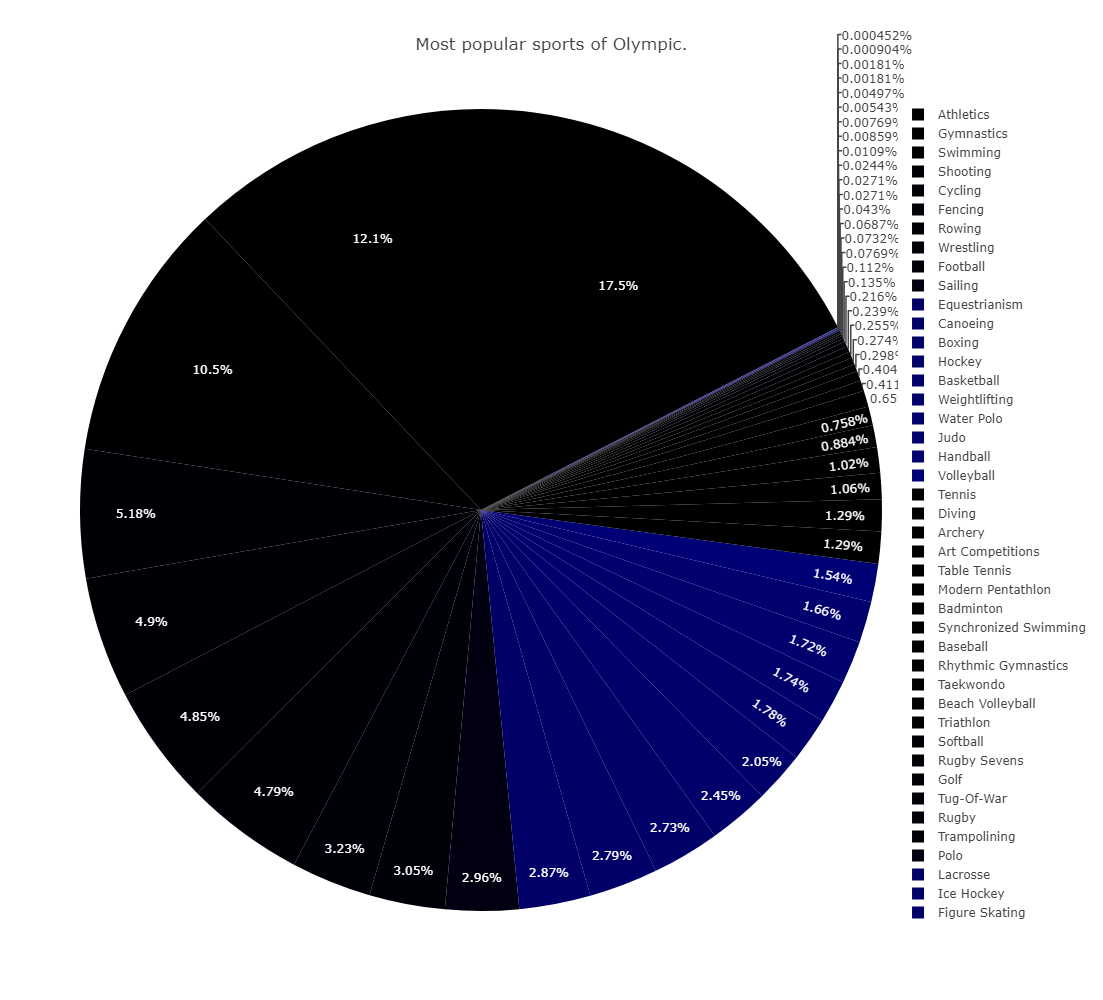

In [153]:
fig = px.pie(sport_df, values='count', names='Sport', title='Most popular sports of Olympic.')
fig.update_layout(autosize=False, width=1000,height=1000)
fig.show()

In [168]:
long = pd.read_csv("lat_long.csv")

In [169]:
long

City   latitude   longitude
0           Athina  38.035900   23.787000
1            Paris  48.841465    2.252616
2        St. Louis  38.647900  -90.313800
3           London  51.538700   -0.017200
4        Stockholm  59.345300   18.079000
5        Antwerpen  51.184100    4.382500
6        Amsterdam  52.343400    4.853300
7      Los Angeles  34.073814 -118.240784
8           Berlin  52.514700   13.239500
9         Helsinki  60.187200   24.926800
10       Melbourne -37.820900  144.978300
11            Rome  41.933964   12.454297
12           Tokyo  35.677800  139.714500
13     Mexico City  19.331900  -99.192200
14          Munich  48.173200   11.546600
15        Montreal  45.557700  -73.551500
16          Moskva  55.781200   37.626100
17           Seoul  37.515800  127.072800
18       Barcelona  41.364700    2.155700
19         Atlanta  33.760000  -84.393200
20          Sydney -33.835400  151.065400
21         Beijing  39.992900  116.396500
22  Rio de Janeiro -22.893300  -43.292300